In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Adjust the path if your file is in a different directory
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv"

# Skip metadata rows at the top of the CSV file
df = pd.read_csv(file_path, skiprows=4)
# Display the first few rows to understand the structure
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [4]:
# Drop unnecessary columns
df_clean = df.drop(columns=["Indicator Name", "Indicator Code", "Country Code", "Unnamed: 69", "2024"], errors='ignore')

# Set country name as index
df_clean.set_index("Country Name", inplace=True)

# Transpose so years are rows and countries are columns
df_transposed = df_clean.transpose()

# Convert index (years) to integer type
df_transposed.index = df_transposed.index.astype(int)

# Preview the cleaned data
df_transposed.head()


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,54922.0,130072080.0,9035043.0,97630925.0,5231654.0,1608800.0,9510.0,91540853.0,131334.0,20386045.0,...,32500.0,32531933.0,64431.0,3.021529e+09,112490.0,984846.0,5532301.0,16440172.0,3153729.0,3809389.0
1961,55578.0,133534923.0,9214083.0,99706674.0,5301583.0,1659800.0,10283.0,93931683.0,137989.0,20726276.0,...,34300.0,33409059.0,66264.0,3.062769e+09,115496.0,1011421.0,5655232.0,16908035.0,3254086.0,3930401.0
1962,56320.0,137171659.0,9404406.0,101854756.0,5354310.0,1711319.0,11086.0,96428599.0,144946.0,21072538.0,...,35000.0,34288560.0,68174.0,3.117373e+09,118597.0,1036950.0,5782221.0,17418522.0,3358099.0,4055959.0
1963,57002.0,140945536.0,9604487.0,104089175.0,5408320.0,1762621.0,11915.0,99038509.0,152211.0,21421705.0,...,39800.0,35249101.0,70159.0,3.184063e+09,121764.0,1062737.0,5911135.0,17954564.0,3465907.0,4185877.0
1964,57619.0,144904094.0,9814318.0,106388440.0,5464187.0,1814135.0,12764.0,101729760.0,159692.0,21769453.0,...,40800.0,36201563.0,72219.0,3.251253e+09,124894.0,1090270.0,6048006.0,18511361.0,3577017.0,4320006.0


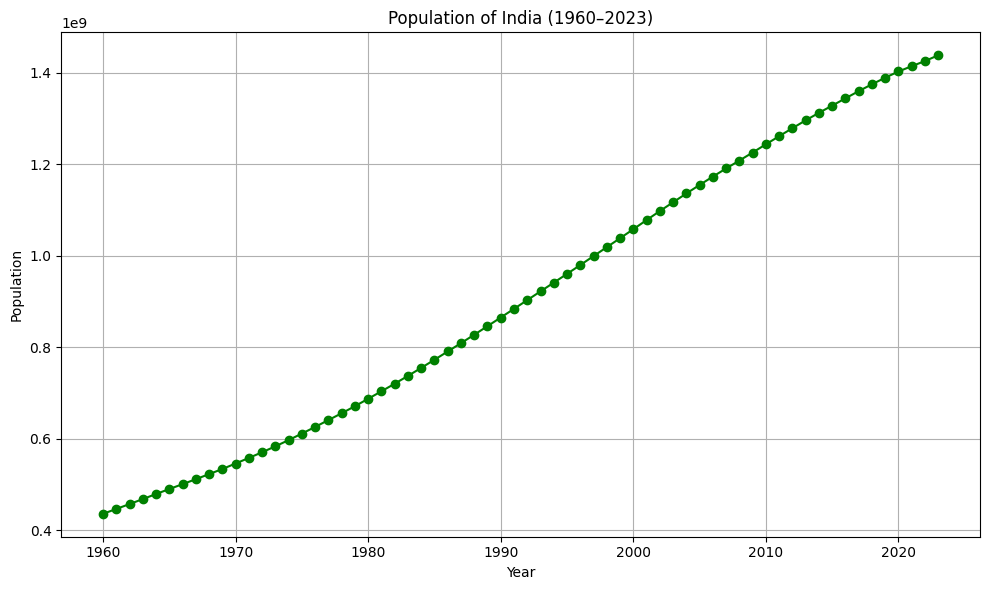

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df_transposed.index, df_transposed["India"], marker='o', linestyle='-', color='green')
plt.title("Population of India (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()


for multiple countries


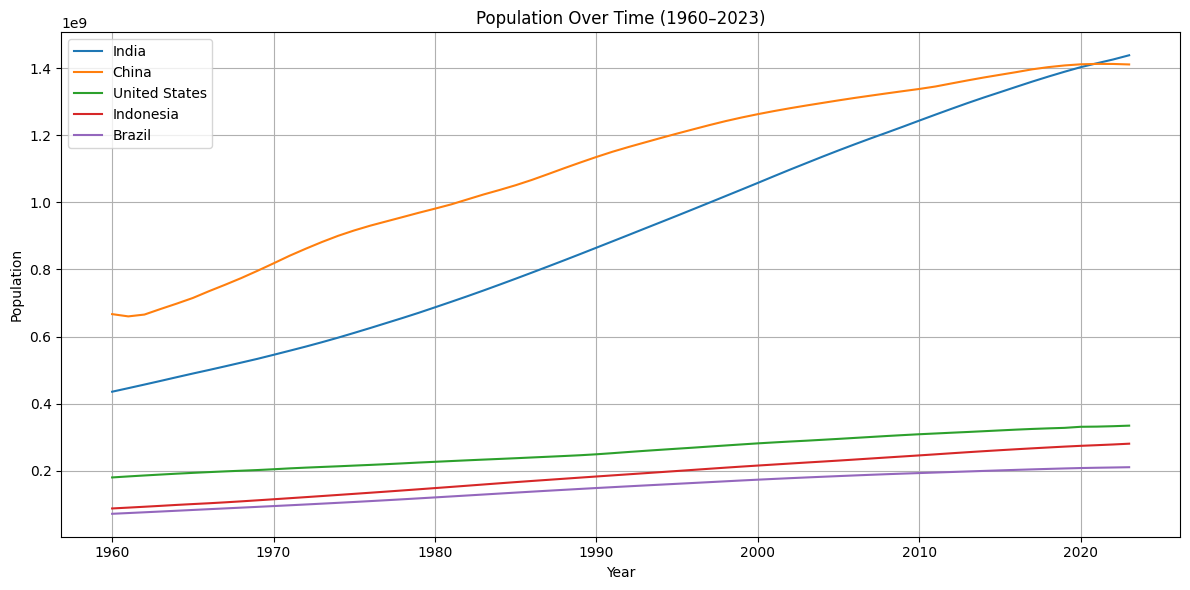

In [6]:
# Select a few countries
countries = ["India", "China", "United States", "Indonesia", "Brazil"]

# Plot each country
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_transposed.index, df_transposed[country], label=country)

plt.title("Population Over Time (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


year 2023 data

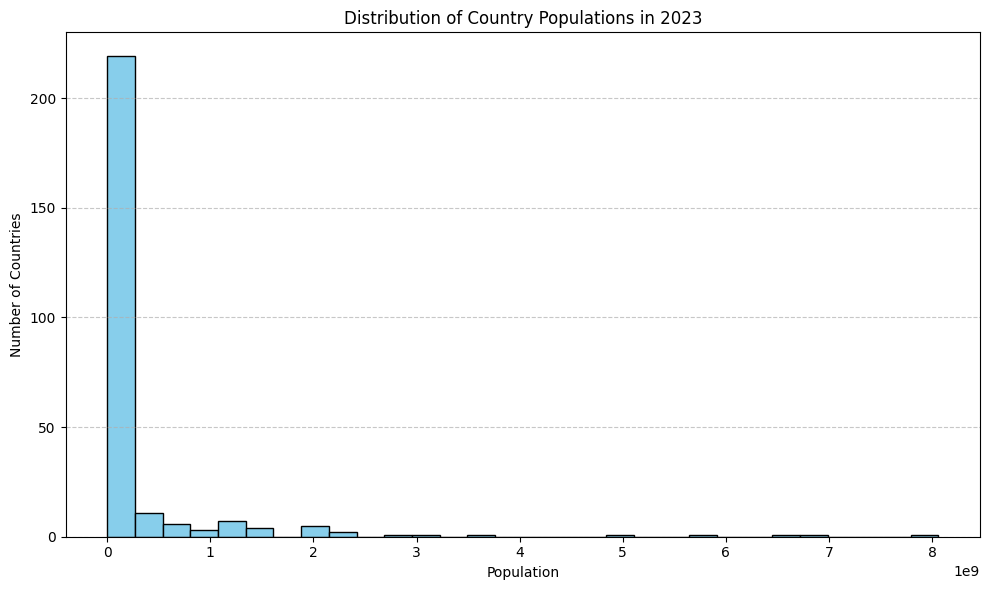

In [8]:
# Keep only the necessary columns and remove missing values
population_2023 = df[["Country Name", "2023"]].dropna()


# Extract population values
population_values = population_2023["2023"]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(population_values, bins=30, color='green', edgecolor='black')
plt.title("Distribution of Country Populations in 2023")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


LAST 10 YEARS INDIA POPULATION

In [12]:
last_10_years=df_transposed.tail(10)

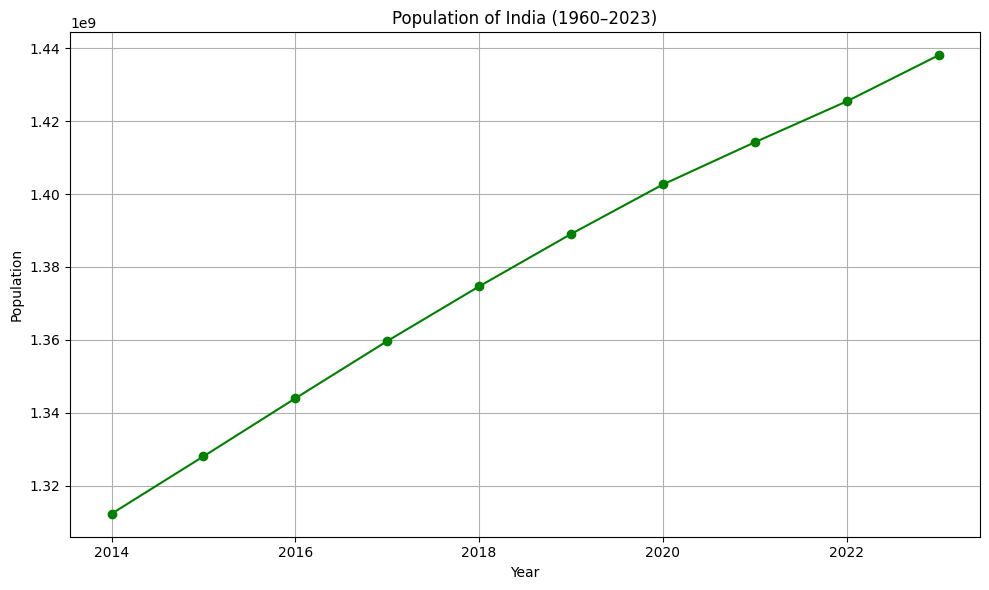

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(last_10_years.index, last_10_years["India"], marker='o', linestyle='-', color='green')
plt.title("Population of India (1960–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()